In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from keras import utils

In [ ]:
pip install tf-keras-vis

In [ ]:
# read test
test= pd.read_csv('/content/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# read train  28x28 pixels
train = pd.read_csv('/content/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
#label - label of the numbers
Y_train = train["label"] #output - label
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) #except label - all other 784 pixels(28x28)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

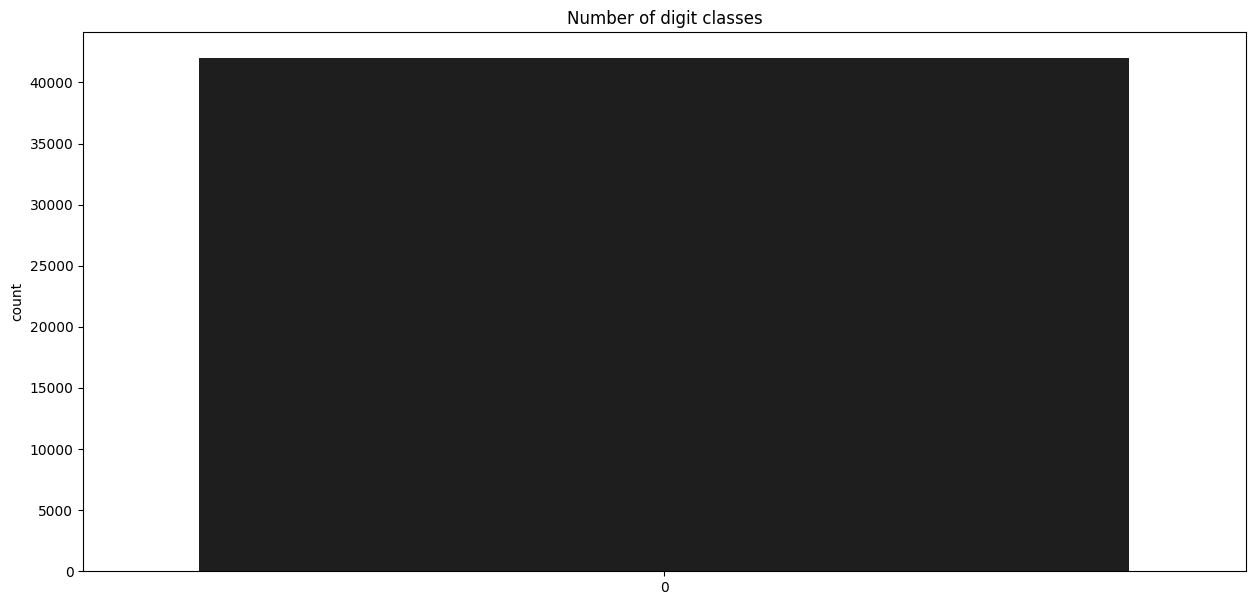

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire") #seaborn
plt.title("Number of digit classes")
Y_train.value_counts()

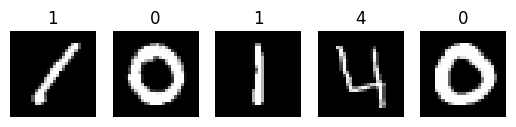

In [ ]:
# plotting samples
#img=X_train.iloc[0].as_matrix() as_matrix-converts to numpy representation - deperecated
for i in range(5):
    img = X_train.iloc[i].to_numpy()
    #iloc - position, to_numpy - converts the frame to numpy array representation
    img = img.reshape((28,28)) # converting vector to 28x28
    sp=plt.subplot(1,5,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(train.iloc[i,0]) #label
    plt.axis("off")
    sp.axis("off")
plt.show()

In [ ]:
# Normalization - reduces the effect of illumination differences
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

AttributeError: ignored

In [ ]:
pip install np_utils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=b65eec6fab2fca216746b0e8591b0a65318bcf10ec1697e0fe25ea424bed054d
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
# Label Encoding
from keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
#using 10% of train data for validation
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


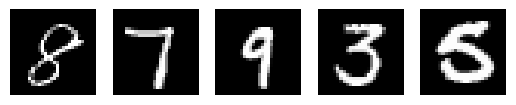

In [ ]:
# Some examples
for i in range(5):
    sp=plt.subplot(1,5,i+1)
    plt.imshow(X_train[i][:,:,0],cmap='gray')
    plt.axis("off")
    sp.axis("off")
plt.show()

In [ ]:
#convolutional neural network
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# conv -> maxpool -> dropout ->conv->maxpool->dropout->fullyconnected(flatten,dense,dropout,dense)
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1))) #5x5 filter
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #drop 25% of neurons
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten()) #converting to a vector
model.add(Dense(256, activation = "relu")) #relu
model.add(Dropout(0.5)) #dropout-regularization approach, prevents overfitting
model.add(Dense(10, activation = "softmax")) #softmax - multinomial distribution

In [ ]:
#define the optimizer
#adam optimizer - stochastic gradient descent
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 15
batch_size = 250

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
151/151 [==============================] - 33s 207ms/step - loss: 1.2253 - accuracy: 0.5843 - val_loss: 0.2723 - val_accuracy: 0.9324
Epoch 2/15
151/151 [==============================] - 31s 202ms/step - loss: 0.4761 - accuracy: 0.8456 - val_loss: 0.1429 - val_accuracy: 0.9600
Epoch 3/15
151/151 [==============================] - 31s 208ms/step - loss: 0.3424 - accuracy: 0.8925 - val_loss: 0.1060 - val_accuracy: 0.9679
Epoch 4/15
151/151 [==============================] - 30s 198ms/step - loss: 0.2735 - accuracy: 0.9150 - val_loss: 0.0867 - val_accuracy: 0.9750
Epoch 5/15
151/151 [==============================] - 32s 209ms/step - loss: 0.2409 - accuracy: 0.9236 - val_loss: 0.0773 - val_accuracy: 0.9764
Epoch 6/15
151/151 [==============================] - 30s 200ms/step - loss: 0.2115 - accuracy: 0.9345 - val_loss: 0.0676 - val_accuracy: 0.9793
Epoch 7/15
151/151 [==============================] - 31s 206ms/step - loss: 0.1964 - accuracy: 0.9383 - val_loss: 0.0648 - val_ac

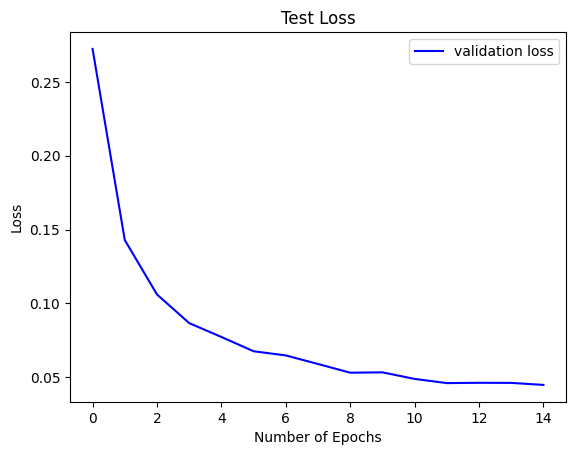

In [ ]:
#evaluate the model
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 2s 12ms/step


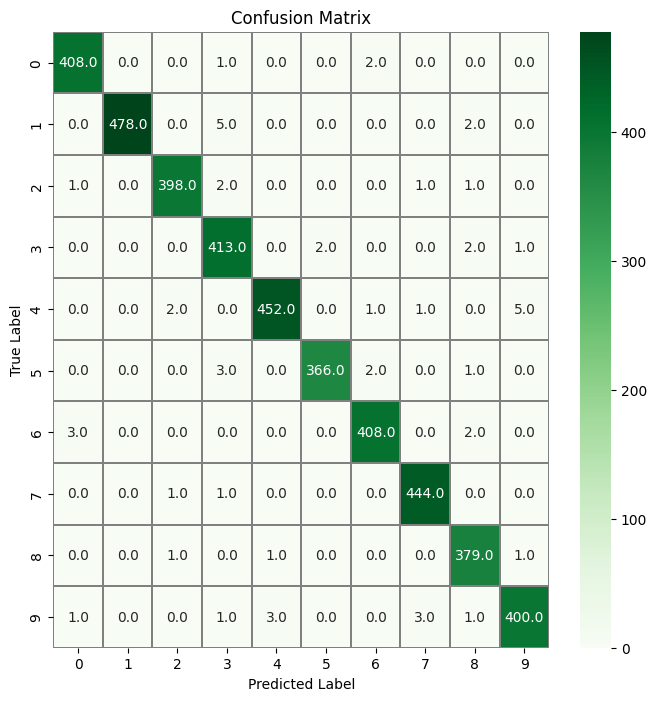

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Accuracy
import sklearn.metrics
acc=sklearn.metrics.accuracy_score(Y_true,Y_pred_classes)
print(acc)

0.9871428571428571


1/1 [==============================] - 0s 21ms/step


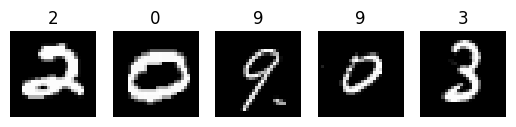

In [ ]:
#predictions
ts=test[0:5]
ts_pred=model.predict(ts)
ts_pred_classes=np.argmax(ts_pred,axis=1)
ts_pred_classes
for i in range(5):
    sp=plt.subplot(1,5,i+1)
    plt.imshow(test[i][:,:,0],cmap='gray')
    plt.title(ts_pred_classes[i])
    plt.axis("off")
    sp.axis("off")
plt.show()

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([1, 2, 3])

# Instead of using CategoricalScore object,
# you can also define the function from scratch as follows:
def score_function(output):
    # The `output` variable refers to the output of the model,
    # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
    return (output[0][1], output[1][4], output[2][5])


In [ ]:
x_train = np.array(x_train,dtype="float32")
x_test = np.array(x_test,dtype="float32")

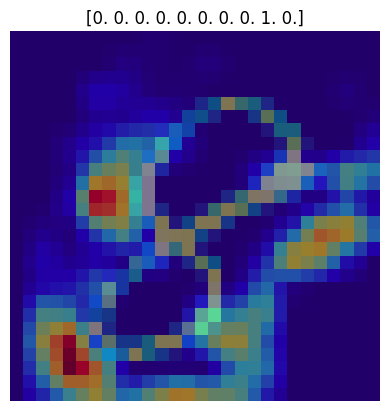

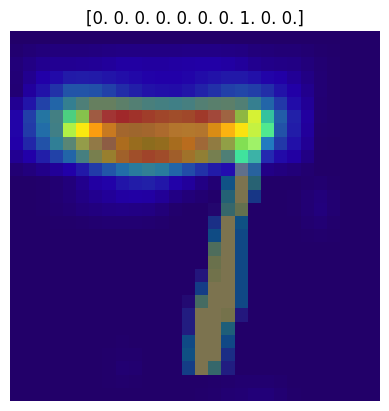

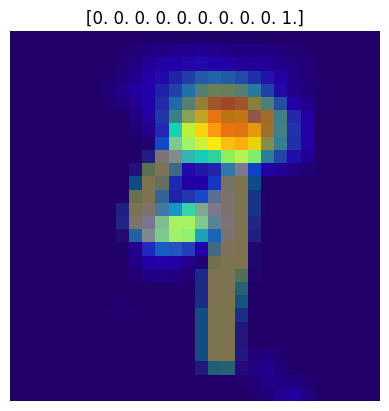

CPU times: user 628 ms, sys: 149 ms, total: 777 ms
Wall time: 760 ms


In [ ]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              x_train[:3],
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
for i in range(3):
  heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
  plt.title(Y_train[i])
  plt.imshow(x_train[i])
  plt.imshow(heatmap, cmap='jet', alpha=0.5)
  plt.axis('off')
  plt.show()